In [28]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Loading data
data = Path("Data/description.csv")
data_df = pd.read_csv(data)
data_df.head()

,id,screen_name,default_profile,description,created_at,geo_enabled,lang,statuses_count,followers_count,favourites_count,...,you,youll,young,your,youre,yourself,youth,youtube,youtuber,yrs
0,16282004,eckates,1,My name is Enrique! ! I'm a highly experienced...,2008-09-14 13:20:09,0,en,11405,819,0,...,0,0,0,0,0,0,0,0,0,0
1,16740486,genebailey,0,"Author, Speaker, Father, Friend, Motivator, Re...",2008-10-14 18:11:24,1,en,520,219,36,...,0,0,0,0,0,0,0,0,0,0
2,17132768,patrickghoward,0,Patrick G Howard is an experienced project & p...,2008-11-03 16:51:00,0,en,4671,38877,6,...,0,0,0,0,0,0,0,0,0,0
3,18013384,DoggieCakes,0,Dog Bakery and Boutique - Retail (Events and O...,2008-12-10 06:44:57,1,en,8512,2069,70,...,0,0,0,0,0,0,0,0,0,0
4,21331733,DavidVarrone,0,Home Based Business and Personal Development C...,2009-02-19 20:46:02,0,en,245,6656,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_df.dtypes.tolist()

[dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),


In [4]:
data_df.columns.tolist()

['id',
 'screen_name',
 'default_profile',
 'description',
 'created_at',
 'geo_enabled',
 'lang',
 'statuses_count',
 'followers_count',
 'favourites_count',
 'verified',
 'account_type',
 'cleaned_description',
 'abc',
 'about',
 'acab',
 'account',
 'across',
 'act',
 'action',
 'activist',
 'actor',
 'actress',
 'actriz',
 'ad',
 'add',
 'addict',
 'adult',
 'adventure',
 'adventurer',
 'adventures',
 'advice',
 'advisor',
 'advocate',
 'affairs',
 'affiliate',
 'affiliated',
 'aficionado',
 'after',
 'again',
 'against',
 'age',
 'agency',
 'agent',
 'ai',
 'aint',
 'air',
 'aka',
 'al',
 'album',
 'all',
 'ally',
 'alone',
 'along',
 'also',
 'alum',
 'alumna',
 'alumni',
 'always',
 'am',
 'amante',
 'amateur',
 'amazing',
 'amazon',
 'ambassador',
 'america',
 'american',
 'americas',
 'amo',
 'amor',
 'an',
 'analysis',
 'analyst',
 'anchor',
 'and',
 'angeles',
 'animal',
 'animals',
 'anime',
 'another',
 'any',
 'anyone',
 'anything',
 'ao',
 'aos',
 'ap',
 'app',
 'apple',

In [5]:
X = data_df.copy()
X.drop("account_type", axis=1, inplace=True)
X.head()

,id,screen_name,default_profile,description,created_at,geo_enabled,lang,statuses_count,followers_count,favourites_count,...,you,youll,young,your,youre,yourself,youth,youtube,youtuber,yrs
0,16282004,eckates,1,My name is Enrique! ! I'm a highly experienced...,2008-09-14 13:20:09,0,en,11405,819,0,...,0,0,0,0,0,0,0,0,0,0
1,16740486,genebailey,0,"Author, Speaker, Father, Friend, Motivator, Re...",2008-10-14 18:11:24,1,en,520,219,36,...,0,0,0,0,0,0,0,0,0,0
2,17132768,patrickghoward,0,Patrick G Howard is an experienced project & p...,2008-11-03 16:51:00,0,en,4671,38877,6,...,0,0,0,0,0,0,0,0,0,0
3,18013384,DoggieCakes,0,Dog Bakery and Boutique - Retail (Events and O...,2008-12-10 06:44:57,1,en,8512,2069,70,...,0,0,0,0,0,0,0,0,0,0
4,21331733,DavidVarrone,0,Home Based Business and Personal Development C...,2009-02-19 20:46:02,0,en,245,6656,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Define target vector
y = data_df["account_type"].values.reshape(-1, 1)
y[:5]


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [7]:
#drop the non-numerical columns
X = X.drop(columns=['screen_name', 'description', 'created_at', 'lang','cleaned_description'])


In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [11]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Create the random forest classifier instance
# 500 took about 5 minutes to run
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [17]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [18]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5162,187
Actual 1,658,1479


Accuracy Score : 0.8871226289072937
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      5349
           1       0.89      0.69      0.78      2137

    accuracy                           0.89      7486
   macro avg       0.89      0.83      0.85      7486
weighted avg       0.89      0.89      0.88      7486



In [26]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:20]

[(0.13328510125741982, 'favourites_count'),
 (0.12983741844842045, 'followers_count'),
 (0.09536504754391177, 'statuses_count'),
 (0.03692125014579758, 'geo_enabled'),
 (0.034684137755511414, 'verified'),
 (0.03171452580119614, 'id'),
 (0.018036558534808546, 'default_profile'),
 (0.010989643350299928, 'bot'),
 (0.010251970110298029, 'you'),
 (0.008243709191072656, 'come'),
 (0.006617200501479181, 'check'),
 (0.005842825325602501, 'and'),
 (0.00550526454282666, 'the'),
 (0.004898638844040235, 'of'),
 (0.004718554617658421, 'by'),
 (0.004345529197175807, 'to'),
 (0.003926621654402722, 'in'),
 (0.00345835423921527, 'waiting'),
 (0.0033920428259905542, 'like'),
 (0.003340388951246395, 'want')]

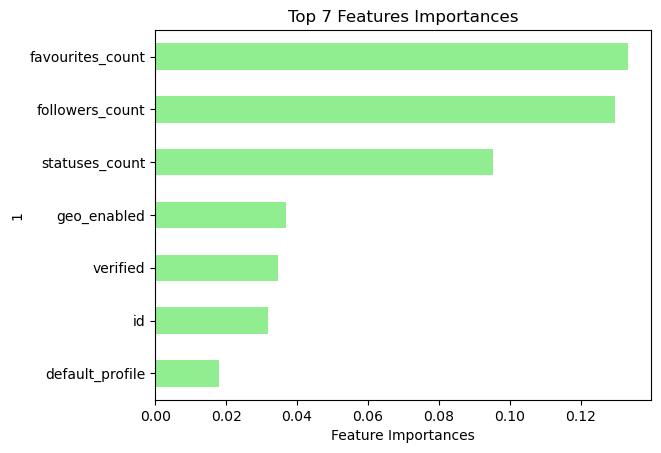

In [31]:
# Visualize the features by importance
#too many variables
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
top_5_importances = importances_sorted.tail(7)
top_5_importances.plot(kind='barh', color='lightgreen', title='Top 7 Features Importances', legend=False)
plt.xlabel('Feature Importances')
plt.show()